In [1]:
import  fastai
import cv2
import keras
import tensorflow as tf

from fastai.vision import *

from fastai.basics import *
fastai.basic_train.Learner

Using TensorFlow backend.


fastai.basic_train.Learner

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [3]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


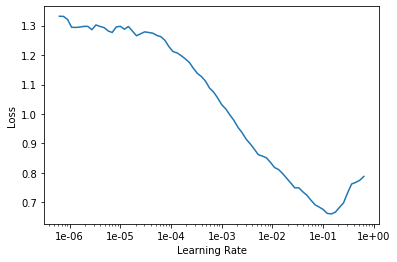

In [4]:
learn.recorder.plot()

In [5]:
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.183728,0.141070,0.964181,01:08
1,0.094945,0.063665,0.980373,01:07
2,0.047936,0.039925,0.988224,01:07
3,0.040475,0.020923,0.993621,01:07
4,0.037144,0.013430,0.995584,01:07


In [6]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.018361,0.019430,0.992640,01:10


In [24]:
learn.data.train_ds[5]

(Image (3, 28, 28), Category 3)

In [16]:
learn.save('five_a_epoch')

In [17]:
data = learn.data.train_ds[0][0]
data

In [18]:
pred = learn.predict(data)
pred

(Category 3, tensor(0), tensor([9.9988e-01, 1.1779e-04]))

In [19]:
learn.data.classes

['3', '7']

In [20]:
probs = pred[2]

In [25]:
learn.data.valid_ds[0][0]

In [26]:
learn.data.batch_size

64

In [27]:
preds = learn.get_preds()
preds

[tensor([[1.0000e+00, 7.0721e-09],
         [1.0000e+00, 3.7881e-08],
         [9.9999e-01, 9.5059e-06],
         ...,
         [4.3049e-08, 1.0000e+00],
         [3.7340e-11, 1.0000e+00],
         [4.0309e-07, 1.0000e+00]]), tensor([0, 0, 0,  ..., 1, 1, 1])]

In [28]:
preds[0]

tensor([[1.0000e+00, 7.0721e-09],
        [1.0000e+00, 3.7881e-08],
        [9.9999e-01, 9.5059e-06],
        ...,
        [4.3049e-08, 1.0000e+00],
        [3.7340e-11, 1.0000e+00],
        [4.0309e-07, 1.0000e+00]])

In [29]:
preds[1]

tensor([0, 0, 0,  ..., 1, 1, 1])

In [30]:
preds[1][0]

tensor(0)

In [31]:
len(learn.data.valid_ds)

2038

In [32]:
len(preds[0]), len(preds[1])

(2038, 2038)

In [33]:
learn.get_preds(ds_type=DatasetType.Train)

[tensor([[9.9976e-01, 2.4049e-04],
         [1.0000e+00, 2.8092e-11],
         [9.9636e-01, 3.6426e-03],
         ...,
         [1.3883e-05, 9.9999e-01],
         [9.9999e-01, 8.5377e-06],
         [1.0000e+00, 1.3119e-11]]), tensor([0, 0, 0,  ..., 1, 0, 0])]

In [34]:
learn.get_preds(with_loss=True)

[tensor([[1.0000e+00, 7.0721e-09],
         [1.0000e+00, 3.7881e-08],
         [9.9999e-01, 9.5059e-06],
         ...,
         [4.3049e-08, 1.0000e+00],
         [3.7340e-11, 1.0000e+00],
         [4.0309e-07, 1.0000e+00]]),
 tensor([0, 0, 0,  ..., 1, 1, 1]),
 tensor([-0.0000e+00, -0.0000e+00, 9.5367e-06,  ..., -0.0000e+00, -0.0000e+00,
         3.5763e-07])]

In [35]:
str(learn.metrics)

'[<function accuracy at 0x0000019A7ECFD678>]'

In [36]:
learn.validate()

[0.019430127, tensor(0.9926)]

In [37]:
learn.validate(learn.data.valid_dl)

[0.019430127, tensor(0.9926)]

In [38]:
learn.validate(learn.data.train_dl)

[0.007430359, tensor(0.9980)]

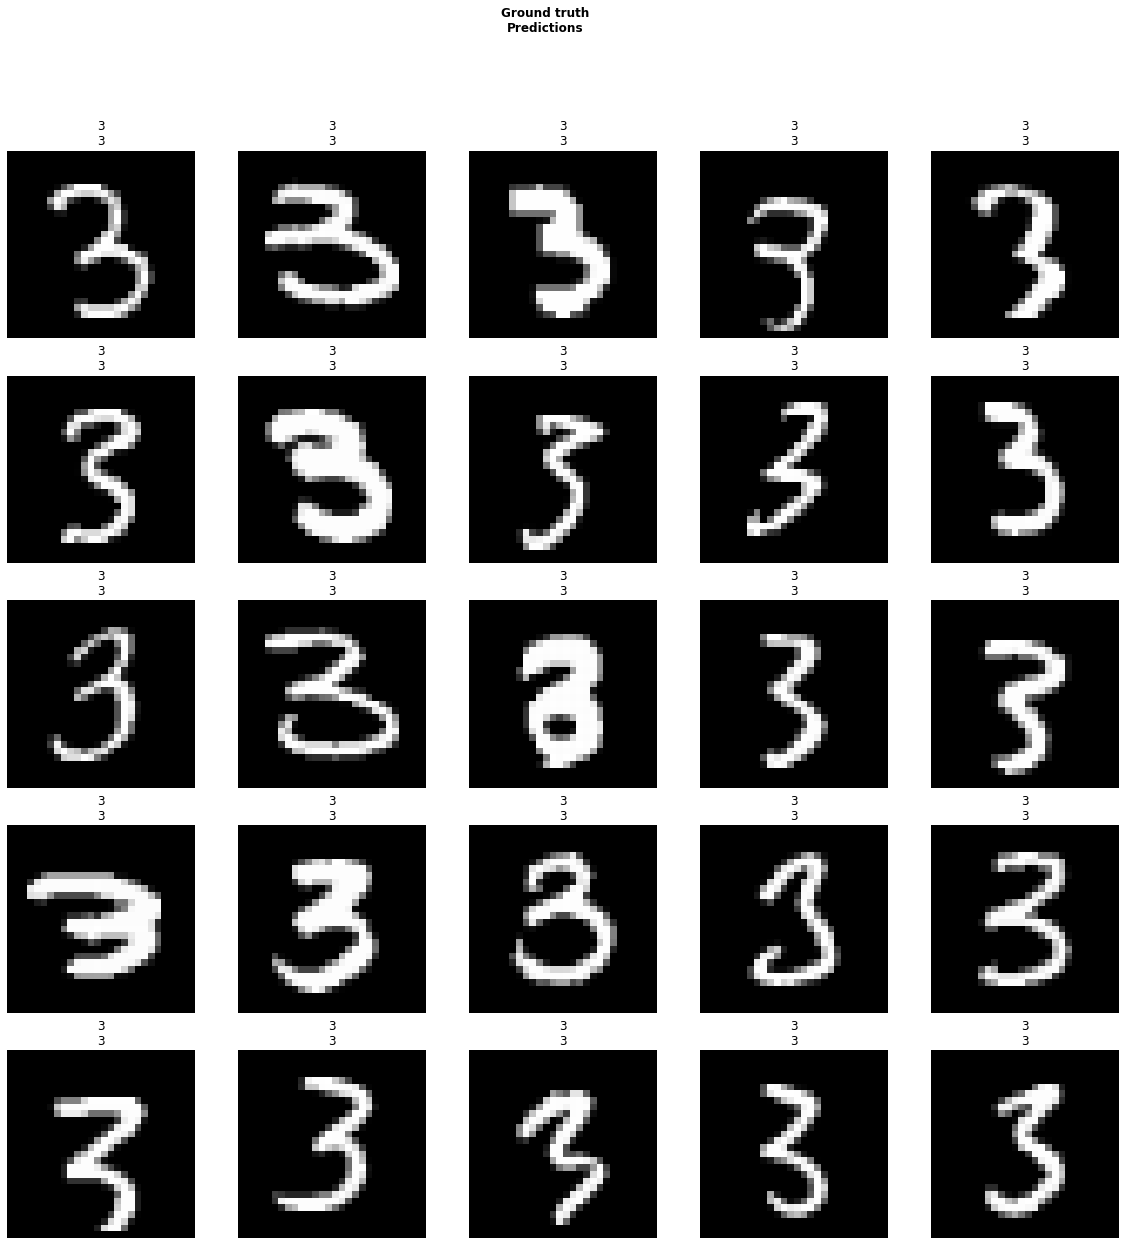

In [39]:
learn.show_results()